# I. Coût des méthodes de tri

Tout d'abord, création d'une liste non triée de $n$ éléments compris entre 1 et 10000


In [1]:
from random import randint
def nouv_liste(n):
    return [randint(1,10000) for _ in range(n)]

print(nouv_liste(15))

[7987, 1987, 835, 965, 4712, 947, 4417, 182, 3065, 5628, 3795, 5302, 7225, 2198, 4954]


## 1. Le tri par insertion

Le **coût d'un algorithme** est le nombre d'opérations élémentaires (arithmétiques ou logiques) ainsi que le nombre d'affectations nécessaires.

Compléter l'algorithme suivant pour qu'il comptabilise son coût *(le coût n'est pas 18)*


In [2]:
def tri_insertion(liste):
    cout=0
    for i in range(1,len(liste)):
        el=liste[i]
        j=i-1
        cout=cout+2             #deux affectations
        while j>=0 and liste[j]>el:
            liste[j+1]=liste[j]
            j-=1
            cout=cout+2             #deux affectations
        liste[j+1]=el
        cout=cout+1            #une affectation
    return cout
        
liste=nouv_liste(10)
print(f"Cout du tri par insertion 10   {tri_insertion(liste) :>8}")
liste=nouv_liste(100)
print(f"Cout du tri par insertion 100  {tri_insertion(liste):>8}")
liste=nouv_liste(1000)
print(f"Cout du tri par insertion 1000 { tri_insertion(liste):>8}" )
    

Cout du tri par insertion 10         51
Cout du tri par insertion 100      5097
Cout du tri par insertion 1000   502735


**Réponse**

La boucle for: la variable $i$ va prendre successivement les valeurs de 1 à $n-1$: $n-1$ itérations
- Pour chaque valeur de $i$ il y a trois affectations et une boucle while

- Dans la boucle while, la variable $j$ prend successivement les valeurs $i-1$, $i-2$, ... jusqu'à 0 dans le cas le plus défavorable, il y a donc $i$ itérations dans lesquelles il y a deux affectations,

- Pour un i donné, il y a $3 + 2i$  affectations

Au total le nombre d'affectations vaut:

$\underbrace{3+2\times 1}_{i=1}+\underbrace{3+2\times 2}_{i=2} +\underbrace{3+2\times 3}_{i=3}+\dots \underbrace{3+2\times (n-1)}_{i=n-1}$

$\phantom{000000}=3(n-1)+2(1+2+3+\dots +n-1)=3(n-1)+2\dfrac{(n-1)n}{2}$

$\phantom{000000}=(n-1)(3+n)$



Le coût de l'algorithme de tri par insertion est: **quadratique**

## 2. Tri par selection

Compléter l'algorithme suivant pour qu'il comptabilise son coût.

In [3]:
def tri_selection(liste):  
    cout=0
    for i in range(len(liste)-1):
        min=i
        cout=cout+ 1                          #une affectation
        for j in range(i+1,len(liste)):
            if liste[j]<liste[min]:
                min=j
                cout=cout +1               #une affectation
        if min!=i:
            temp=liste[min]
            liste[min]=liste[i]
            liste[i]=temp
            cout=cout +3                #trois affectations
    return cout
            
liste=nouv_liste(10)
print(f"Cout du tri par insertion 10   {tri_selection(liste) :>8}")
liste=nouv_liste(100)
print(f"Cout du tri par insertion 100  {tri_selection(liste):>8}")
liste=nouv_liste(1000)
print(f"Cout du tri par insertion 1000 { tri_selection(liste):>8}" )

Cout du tri par insertion 10         41
Cout du tri par insertion 100       693
Cout du tri par insertion 1000     9443


**Réponse**
La première boucle for: la variable $i$ va prendre successivement les valeurs de 0 à $n-2$, soit $n-1$ itérations
- Pour chaque valeur de $i$ il y a une boucle for, où $j$ prend successivement les valeurs $i+1$, $i+2$, ... jusqu'à $n$, il y a donc $n-i$ itérations dans lesquelles il y a une affectation

- Il y a ensuite, dans le pire des cas trois affectations

- Donc pour un i donné, il y a $3 + n-i$  affectations

Au total le nombre d'affectations vaut:

$
\underbrace{3+n}_{i=0}+\underbrace{3+n-1}_{i=1} +\underbrace{3+n-2}_{i=2}+\dots \underbrace{3+n-(n-1)}_{i=n-1}$


$\phantom{000000}=3(n-1)+(1+2+3+\dots +n-1)=3(n-1)+\dfrac{(n-1)n}{2}$

$\phantom{000000}=\dfrac{(n-1)(6+n)}{2}$


Le coût de l'algorithme de tri par insertion est: **quadratique**

# II. Temps moyen d'exécution

Jupyter permet l'utilisation de la fonction [magique](https://ipython.org/ipython-doc/dev/interactive/magics.html#magic-timeit) %timeit, qui mesure le temps moyen d'un code sur un très grand nombre d'exécutions.

On va mesurer le temps moyen d'exécution de chaque tri pour une liste de 100, 1000 puis 10000 élements.

On va s'intéresser à l'ordre de grandeur des temps trouvés c'est à dire à la puissance de 10 du temps en secondes

Par exemple : l'ordre de grandeur de  $3,75 \mu s$ est $10^{-6} s$, celui de  $456,1 \mu s$ est  $10^{-4} s$ ou encore celui de  $13,2 ms$ est  $10^{-2}$

Vous exécuterez les deux cellules suivantes puis compléterez les questions

### tri par insertion

In [4]:
def tri_insertion(liste):
    for i in range(1,len(liste)):
        el=liste[i]
        j=i-1
        while j>=0 and liste[j]>el:
            liste[j+1]=liste[j]
            j-=1
        liste[j+1]=el

In [5]:
%timeit tri_insertion(nouv_liste(100))
%timeit tri_insertion(nouv_liste(1000))
%timeit tri_insertion(nouv_liste(10000))

443 µs ± 5.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
36.7 ms ± 834 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.67 s ± 26.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### tri par selection

In [6]:
def tri_selection(liste):  
    for i in range(len(liste)-1):
        min=i
        for j in range(i+1,len(liste)):
            if liste[j]<liste[min]:
                min=j
        if min!=i:
            temp=liste[min]
            liste[min]=liste[i]
            liste[i]=temp


In [7]:
%timeit tri_selection(nouv_liste(100))
%timeit tri_selection(nouv_liste(1000))
%timeit tri_selection(nouv_liste(10000))

404 µs ± 908 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
33.1 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3 s ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Réponse**
<ol>
    <li>Quel tri semble-t-il le plus efficace ?: Le tri par selection semble le plus efficace</li>
    <li>Comparer leurs ordres de grandeurs : 
        <ul>
            <li>pour 100 éléments, l'ordre de grandeur est   $10^{-4}$</li>
            <li>pour 1000 éléments, l'ordre de grandeur est  $10^{-2}$</li>
            <li>pour 10000 éléments, l'ordre de grandeur est $10^{0}$</li>
        </ul>
        l'ordre de grandeur des temps est le même pour chacun des tris
    </li>
    <li><p>Que peut-on dire de l'évolution des ordres de grandeur en fonction du nombre d'éléments de la liste?</p>
    <p>Lorsque le nombre d'éléments est multiplié par 10, le temps est multiplié par 100.    </p>
    </li>
</ol>


## La méthode sort
 La méthode sort est une méthode de tri plus rapide des listes 

In [8]:
%timeit nouv_liste(100).sort()
%timeit nouv_liste(1000).sort()
%timeit nouv_liste(10000).sort()
%timeit nouv_liste(100000).sort()
%timeit nouv_liste(1000000).sort()

123 µs ± 2.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.26 ms ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
13.2 ms ± 16.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
139 ms ± 182 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.48 s ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Réponse**

Que peut-on dire de l'évolution des ordres de grandeur en fonction du nombre d'éléments de la liste?

- pour 100 éléments, l'ordre de grandeur est $10^{-4}$
- pour 1000 éléments, l'ordre de grandeur est $10^{-3}$
- pour 10000 éléments, l'ordre de grandeur est $10^{-2}$
- pour 100000 éléments, l'ordre de grandeur est $10^{-1}$
- pour 1000000 éléments, l'ordre de grandeur est $10^{-0}$

L'évolution de l'ordre de grandeur semble linéaire

# III. Comparaison graphique

Nous allons mesurer le temps d'exécution de chacun des tris pour 100 listes de taille croissante.

Pour cela nous allons créer une liste contenant ces 100 listes et une autre contenant la taille de ces listes.

In [13]:
tab = []
liste_tailles = []
for i in range(1,101):
    taille = 100*i
    liste_tailles.append(taille)
    t = [randint(1,100_000) for i in range(taille)]
    tab.append(t)

Ensuite, nous créons une fonction qui renvoie la liste des temps d'exécution des 100 listes créées précédemment pour un tri donné.

In [10]:
from time import *

def liste_temps(tri):
    """mesure le temps d'exécution de la fonction tri
    prend en argument une méthode de tri: tri_selection,tri_insertion, sorted
    renvoie une liste des temps d'exécution de chaque liste de la liste tableaux"""
    lste_temps=[]
    for tab in tableaux:
        time1 =perf_counter()
        tri(tab)
        time2 = perf_counter()
        lste_temps.append(1000*(time2 - time1))
    return lste_temps


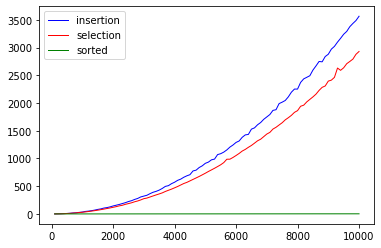

In [30]:
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline
plt.ion()

#les abscisses sont les tailles des tableaux (liste_tailles)
#les ordonnées seront les temps de calcul

#def graphique():
#copie de ce tableau
tableaux=deepcopy(tab)
#création des points pour le tri par insertion
plt.plot(liste_tailles, liste_temps(tri_insertion),color="blue", linewidth=1.0, linestyle="-",label="insertion")
#création des points pour le tri par selection
tableaux=deepcopy(tab)
plt.plot(liste_tailles, liste_temps(tri_selection),color="red", linewidth=1.0, linestyle="-",label="selection")
#création des points pour le tri sorted
tableaux=deepcopy(tab)
plt.plot(liste_tailles, liste_temps(sorted),color="green", linewidth=1.0, linestyle="-",label="sorted")
plt.legend(loc='upper left')
plt.show()

In [31]:
def Tab():
    tab = []
    for i in range(1,101):
        taille = 100*i
        t = [randint(1,100_000) for i in range(taille)]
        tab.append(t)
    return tab

def graphique():
    #copie de ce tableau
    tableaux=Tab()
    #création des points pour le tri par insertion
    plt.plot(liste_tailles, liste_temps(tri_insertion),color="blue", linewidth=1.0, linestyle="-",label="insertion")
    #création des points pour le tri par selection
    tableaux=Tab()
    plt.plot(liste_tailles, liste_temps(tri_selection),color="red", linewidth=1.0, linestyle="-",label="selection")
    #création des points pour le tri sorted
    tableaux=Tab()
    plt.plot(liste_tailles, liste_temps(sorted),color="green", linewidth=1.0, linestyle="-",label="sorted")
    plt.legend(loc='upper left')
    plt.show()

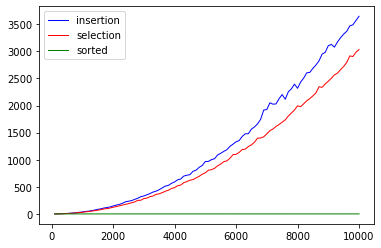

In [32]:
graphique()